## Assignment Objective:
* Compute basic statistics (mean, median, min, max) of relevant climate variables.
* Identify any trends or patterns in the data using statistical summaries and visualizations.
* Discuss any observations or insights from your EDA process.

### Data Source: 

* Provided by mentor Mr. Desmond, availiable at https://github.com/Desmondonam/Nepal_Climate_change.

### Importing required Libraries

In [2]:
# Importing necessary libraries
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Loading the Shape file provided by Desmond Sir.

In [114]:
# Load the shapefile for Nepal
gdf = gpd.read_file("shape_data/nepal_shapefile.shp")

### Preliminary review of loaded Dataset

In [124]:
# Display first few rows of the GeoDataFrame
gdf.head()  

STATE_CODE   DISTRICT        GaPa_NaPa     Type_GN Province  \
0           1  TAPLEJUNG  Aathrai Tribeni  Gaunpalika        1   
1           1  TAPLEJUNG       Maiwakhola  Gaunpalika        1   
2           1  TAPLEJUNG        Meringden  Gaunpalika        1   
3           1  TAPLEJUNG       Mikwakhola  Gaunpalika        1   
4           1  TAPLEJUNG     Phaktanglung  Gaunpalika        1   

                                            geometry  
0  POLYGON ((87.60985 27.37043, 87.61107 27.36943...  
1  POLYGON ((87.50402 27.42901, 87.50672 27.42831...  
2  POLYGON ((87.51272 27.56894, 87.51255 27.56859...  
3  POLYGON ((87.6885 27.70975, 87.68891 27.70938,...  
4  POLYGON ((87.83673 27.95137, 87.83735 27.95119...

### Checking if cleanup is necessary

In [118]:
# Check for NaN values detailed
print(gdf.isna())  # or df.isnull()

     STATE_CODE  DISTRICT  GaPa_NaPa  Type_GN  Province  geometry
0         False     False      False    False     False     False
1         False     False      False    False     False     False
2         False     False      False    False     False     False
3         False     False      False    False     False     False
4         False     False      False    False     False     False
..          ...       ...        ...      ...       ...       ...
772       False     False      False    False     False     False
773       False     False      False    False     False     False
774       False     False      False    False     False     False
775       False     False      False    False     False     False
776       False     False      False    False     False     False

[777 rows x 6 columns]


In [120]:
# Check for any NaN values 
print(gdf.isna().any())  # or df.isnull()

STATE_CODE    False
DISTRICT      False
GaPa_NaPa     False
Type_GN       False
Province      False
geometry      False
dtype: bool


#### No Null values. Cleanup not needed.

### Loading the Nepal Temprature DATA from TIF file.

In [238]:
# Load temperature data from a TIF file
with rasterio.open("nepal_climate_data/nepal_temperature_2020.tif") as src:
    temp_data = src.read(3)  # Read the third band (temperature data). The Most Appropriate Min/max
    extent = src.bounds  # Get the extent of the raster data (left, right, bottom, top)
    
# Check and Print the shape of the temperature data
print(f"Shape of the temperature data: {temp_data.shape}")
print(f"Extent of the raster: {extent}")

# Check and Print the minimum and maximum values of the temperature data
min_temp = np.min(temp_data)
max_temp = np.max(temp_data)

print(f"Minimum Temperature: {min_temp}°C")
print(f"Maximum Temperature: {max_temp}°C")

Shape of the temperature data: (200, 400)
Extent of the raster: BoundingBox(left=80.0, bottom=26.3, right=88.2, top=30.5)
Minimum Temperature: -15.94282141315838°C
Maximum Temperature: 15.582932308001686°C


##### In the Raster Data above, the Band 1 has quite unrellevent data for Southern zone of Nepal. Therefore loading data from band 3, which is little better.

###

### Plotting a HeatMap from the available Data.

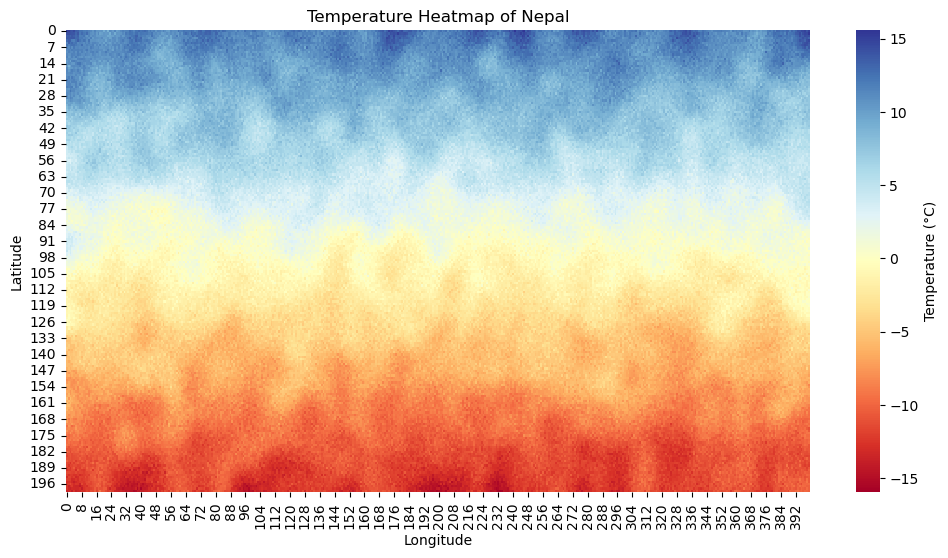

In [240]:
# Create a heatmap of the temperature data
fig, ax = plt.subplots(figsize=(12, 6)) #plt.figure(figsize=(10, 6))

sns.heatmap(temp_data, cmap="RdYlBu", cbar_kws={'label': 'Temperature (°C)'})

# Set title and labels
ax.set_title("Temperature Heatmap of Nepal")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Titles and labels can also be set in following ways. Commented for now.
#plt.title("Temperature Heatmap of Nepal")
#plt.xlabel("Longitude")
#plt.ylabel("Latitude")
plt.show()

##### Observation: The data seems acceptable as the southern reason seems hotter while the northen parts are colder. However I don't understand why the range of Lat & Long are so vast.

#### Plotting the boundaries of Nepal.

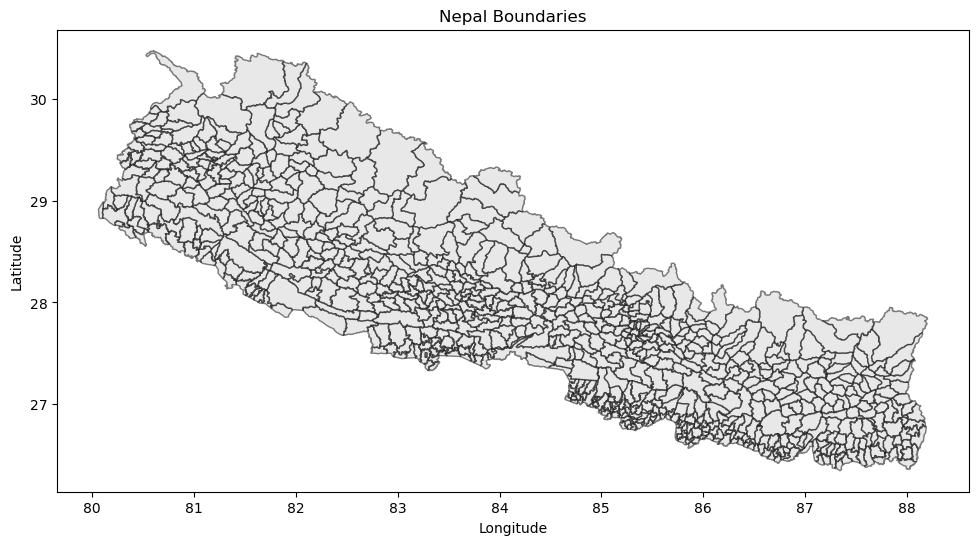

In [242]:
# Create a plot of Nepal's boundaries using GeoPandas
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting Nepal map (shapefile)
gdf.plot(ax=ax, edgecolor="black", facecolor="lightgray", alpha=0.5)

# Set title and labels
ax.set_title("Nepal Boundaries")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Alternate way of showing Titles and labels. Commented for now.
'''
plt.title("Nepal Boundaries")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
'''

plt.show()

### Plotting Temprature Data together with Raster TIF data.

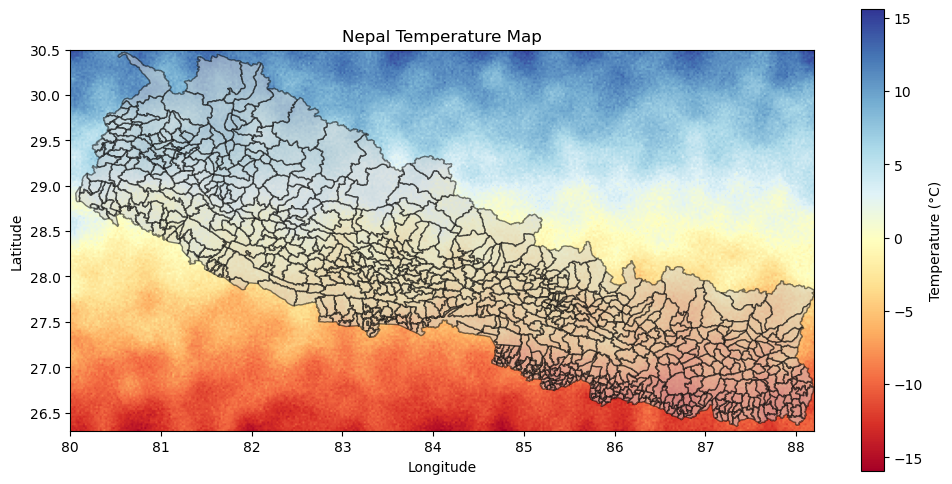

In [244]:
# Plot the temperature data using imshow and overlay on Nepal's shapefile
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting Nepal map (shapefile)
gdf.plot(ax=ax, edgecolor="black", facecolor="lightgray", alpha=0.5)

# Manually define the range of temperature values for the color map
min_temp = np.min(temp_data)  # Use the minimum temperature value
max_temp = np.max(temp_data)  # Use the maximum temperature value

# Plotting temperature data (TIFF) on top of the map of Nepal's boundaries with manual color scaling
im = ax.imshow(temp_data, cmap="RdYlBu", extent=[extent.left, extent.right, extent.bottom, extent.top], vmin=min_temp, vmax=max_temp)

# Adding colorbar (Legend)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Temperature (°C)")

# Set title and labels
ax.set_title("Nepal Temperature Map")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Alternate way of showing Titles and labels. Commented for now.
'''
plt.title("Nepal Temperature Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
'''

plt.show()

#### Above map shows that southern reason are hotter while the Northern parts are colder.

### Trying to read some statistics amnd plot some Trends.

In [168]:
# Convert temperature data to a Pandas DataFrame for easier manipulation

# Flattening the 2D array into a 1D array
temp_flat = temp_data.flatten()  
temp_df = pd.DataFrame(temp_flat, columns=["Temperaturexxx"])

In [170]:
# Basic summary statistics
summary_stats = temp_df['Temperature'].describe()
print("Summary Statistics of Temperature Data:")
print(summary_stats)

Summary Statistics of Temperature Data:
count    80000.000000
mean        -7.577416
std          7.295553
min        -23.198750
25%        -13.660651
50%         -7.685703
75%         -1.132268
max          8.138671
Name: Temperature, dtype: float64


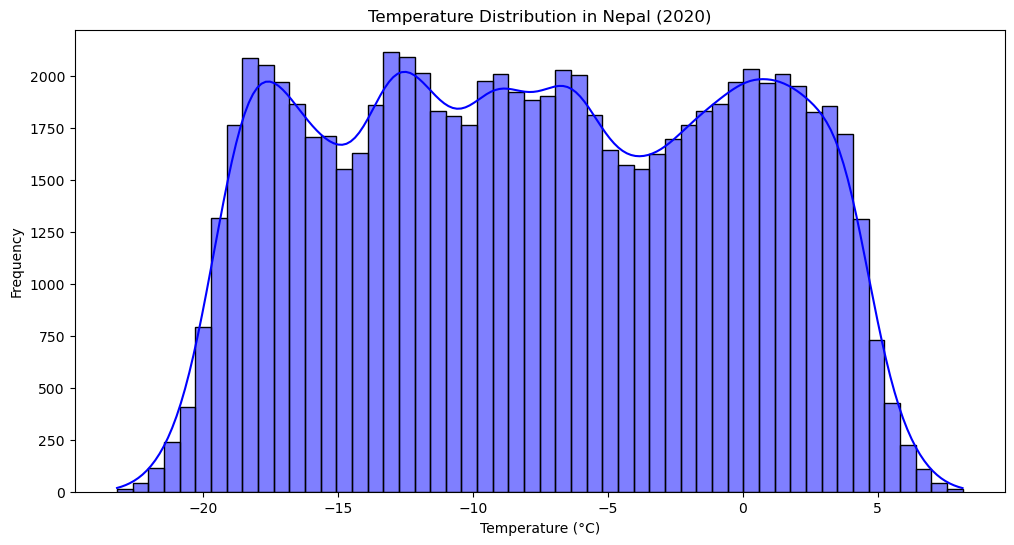

In [172]:
# Plot a histogram of the temperature data to understand its distribution
plt.figure(figsize=(12, 6))
sns.histplot(temp_df['Temperature'], kde=True, color="blue")
plt.title("Temperature Distribution in Nepal (2020)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

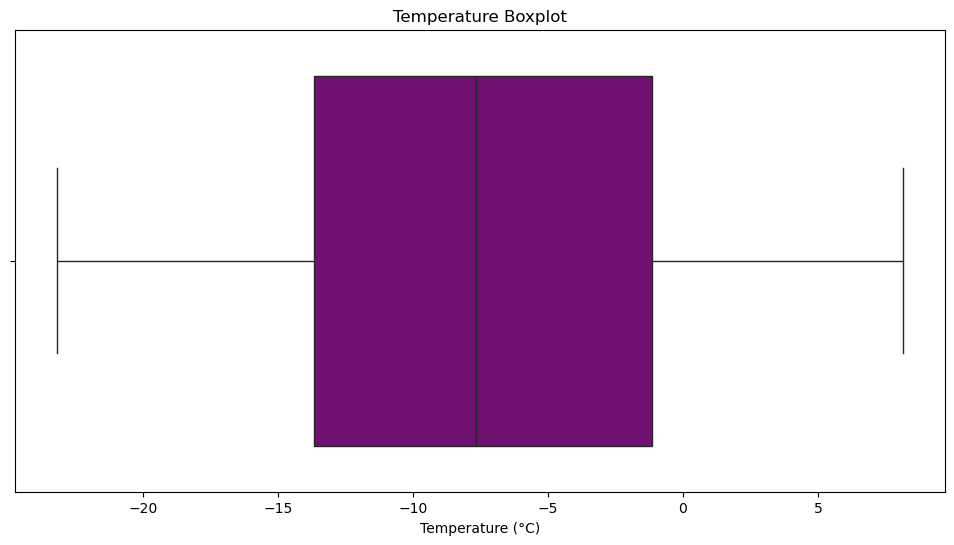

In [174]:
# Boxplot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=temp_df['Temperature'], color="purple")
plt.title("Temperature Boxplot")
plt.xlabel("Temperature (°C)")
plt.show()

### Below trying to plot Temprature Cluster

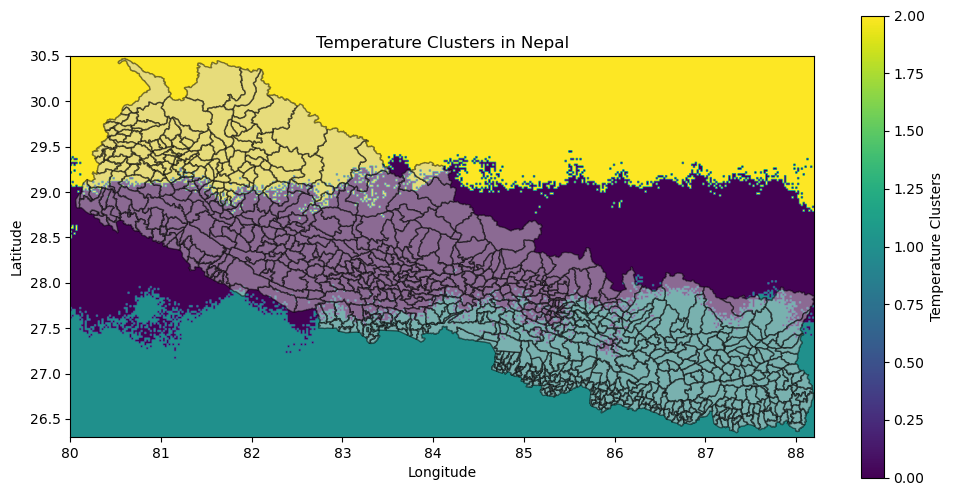

In [275]:
from sklearn.cluster import KMeans

# Reshape the data into a 2D array (pixels as rows and temperature as values)
temp_data_flattened = temp_data.flatten().reshape(-1, 1)

# Apply KMeans clustering to identify temperature clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(temp_data_flattened)

# Add the cluster labels to the data
cluster_labels = kmeans.labels_.reshape(temp_data.shape)

# Plot the temperature data with clusters overlaid
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax, edgecolor="black", facecolor="lightgray", alpha=0.5)

# Plotting the clusters with different colors
im = ax.imshow(cluster_labels, cmap='viridis', extent=[extent.left, extent.right, extent.bottom, extent.top])
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Temperature Clusters")

ax.set_title("Temperature Clusters in Nepal")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

## Insights gained from visualizations:

* Constraints: The data does not seem accurate enough for Nepal, especially the southern Tarai region, which is supposed to be up to 35°C even for the year 2020. 
* Based on the available data and visualization, we can conclude that Nepal has variable temperature clusters, which in the North are colder and in the South are hotter.